In [26]:
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.dummy import DummyClassifier

In [38]:
with open('GBmapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [39]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [40]:
with open('results.pkl', 'rb') as open_file:
    resdf = pkl.load(open_file)

In [41]:
rf_best_smote_est = resdf['estimator'][0].best_estimator_

In [42]:
with open('RF_best_SMOTE_estimator.pkl', 'wb') as open_file:
    pkl.dump(rf_best_smote_est, open_file)

In [43]:
X = mapper.fit_transform(df)

In [44]:
y = df['funded']

In [45]:
dummy = DummyClassifier()
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [46]:
y_pred = rf_best_smote_est.predict(X)
y_dummy = dummy.predict(X)

In [47]:
confusion_matrix(y, y_pred)

array([[  643,  3531],
       [  944, 17639]])

In [48]:
confusion_matrix(y, y_dummy)

array([[  773,  3401],
       [ 3407, 15176]])

In [49]:
y_proba = rf_best_smote_est.predict_proba(X)[:,1]

In [50]:
roc_auc_score(y, y_proba)

0.7022224858848868

In [19]:
cols = mapper.transformed_names_

In [21]:
imps = rf_best_smote_est.feature_importances_

In [22]:
import matplotlib.pyplot as plt

In [23]:
sorted_imps = sorted(list(zip(cols, imps)), key=lambda a: a[1], reverse=True)

In [24]:
import operator

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

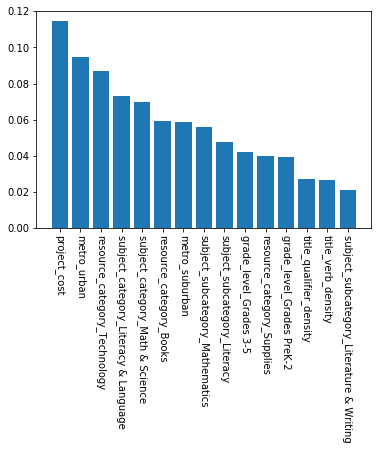

In [25]:
plt.bar([x[0] for x in sorted_imps[:15]], [x[1] for x in sorted_imps[:15]])
plt.xticks(rotation=-90)